<a href="https://colab.research.google.com/github/scottzig/pytorch_examples/blob/main/linear_regression_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install torch

In [3]:
import torch

In [5]:
w = torch.tensor(3.0)
b = torch.tensor(1.0)

In [6]:
def forward(x): # a simple linear model
  y = w*x + b
  return y 

In [7]:
x = torch.tensor(2)
y = forward(x) # pass a tensor through our linear model, the output should be a tensor with value 7
print(y)

tensor(7.)


Is there a better way for us to build a linear model? Yes! Torch comes preloaded with a Linear class. Let's use it.

In [8]:
from torch.nn import Linear

In [9]:
torch.manual_seed(1) # sets 1 as the seed for random numbers
model = Linear(in_features=1, out_features=1) # our linear model will have one output for one input
print(model.bias,model.weight) # print the weight w and bias b set by Linear

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [12]:
x = torch.tensor([[2.0],[3.5],[9.2]])
print(model(x)) # output result of plugging the tensor x into the linear model

tensor([[0.5891],
        [1.3620],
        [4.2990]], grad_fn=<AddmmBackward>)


Let's now take a look at building simple neural networks. We'll start by defining our own linear class.

In [42]:
import torch.nn

In [25]:
class LR(torch.nn.Module): # inherit from the Module class from torch.nn
  def __init__(self, input_size, output_size):
    super().__init__() # call constructor from Module
    self.linear = torch.nn.Linear(input_size, output_size)
  def forward(self, x): # define forward method
    pred = self.linear(x)
    return pred


In [26]:
model = LR(1, 1) # one output for every one input
print(list(model.parameters()))

[Parameter containing:
tensor([[0.1390]], requires_grad=True), Parameter containing:
tensor([-0.1224], requires_grad=True)]


In [27]:
x = torch.tensor([1.0])
print(model.forward(x)) # run the tensor x through our linear model and print the output

tensor([0.0166], grad_fn=<AddBackward0>)


Let's create some data and plot it!

In [34]:
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'y')

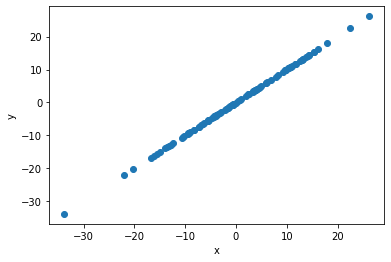

In [32]:
x = torch.randn(100,1)*10 # return a tensor of randomly distributed data with mean 0, variance 10
y = x
plt.plot(x.numpy(), y.numpy(), 'o') # plot our linear data (note we convert x and y to numpy arrays first)
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

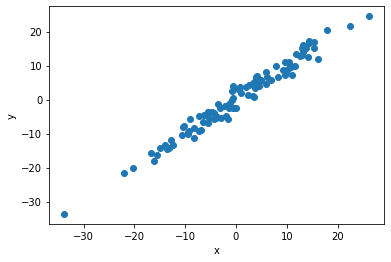

In [38]:
# Now add some noise to our data
y = x + 2*torch.randn(100,1) # add noise to our data
plt.plot(x.numpy(),y.numpy(),'o')
plt.xlabel('x')
plt.ylabel('y')

Returning to our previous model, let's extract the parameters.

In [33]:
def get_parameters(model): # take in a parameter of type LR
  [w, b] = model.parameters()
  return (w[0][0].item(), b[0].item())

params = get_parameters(model)
print(params)

(0.1390169858932495, -0.12244415283203125)


In [36]:
# define a function which will help us plot our linear model
def plot_fit(title, model):
  plt.title = title
  w1, b1 = get_parameters(model)
  x1 = np.array([-30,30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')

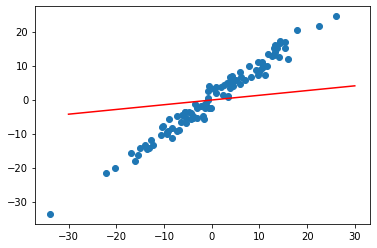

In [39]:
# plot our linear model on top of our data
plt.scatter(x,y)
plot_fit('Initial model', model)
plt.show()

Our model is not good! We need to update our model to better match the data. Our loss function will have the form 
$ e(w,b) = \frac{1}{N} \sum_{i=1}^N (y_i - wx_i + b)^2$. To minimize this and find the optimal $w$ and $b$ values, we will run the gradient descent algorithm on our loss function. Fortunately, PyTorch can do most all of these calculations for us. In particular, it is quite easy to carry out the stochastic gradient descent algorithm through PyTorch.

In [44]:
error = torch.nn.MSELoss() # define the mean square error term
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001) # setup the SGD algorithm to optimize our parameter with learning rate 0.001

We'll now "train" the model, or just run gradient descent on our loss function a specified number of times to find the best fit.

In [45]:
runs = 100 # run the SGD algorithm 100 times
losses = []
for ii in range(runs):
  y_predicted = model.forward(x) # make predictions from data
  loss = error(y_predicted, y) # find error for previous prediction
  print("run: ", ii, " loss: ", loss.item())
  losses.append(loss) # keep track of error values
  optimizer.zero_grad() # zero out the gradient of the error term
  loss.backward() # calculate gradient of error
  optimizer.step() # move in direction of negative gradient

run:  0  loss:  83.5162124633789
run:  1  loss:  52.62095642089844
run:  2  loss:  33.63605880737305
run:  3  loss:  21.96994400024414
run:  4  loss:  14.80114459991455
run:  5  loss:  10.395904541015625
run:  6  loss:  7.688836574554443
run:  7  loss:  6.0252838134765625
run:  8  loss:  5.002954483032227
run:  9  loss:  4.374655246734619
run:  10  loss:  3.9884815216064453
run:  11  loss:  3.7510924339294434
run:  12  loss:  3.605130672454834
run:  13  loss:  3.5153493881225586
run:  14  loss:  3.4600918292999268
run:  15  loss:  3.4260480403900146
run:  16  loss:  3.405040979385376
run:  17  loss:  3.39204478263855
run:  18  loss:  3.3839714527130127
run:  19  loss:  3.3789238929748535
run:  20  loss:  3.3757359981536865
run:  21  loss:  3.3736910820007324
run:  22  loss:  3.3723485469818115
run:  23  loss:  3.3714382648468018
run:  24  loss:  3.3707947731018066
run:  25  loss:  3.3703134059906006
run:  26  loss:  3.369933843612671
run:  27  loss:  3.3696165084838867
run:  28  loss: 

With our model "trained", let's plot the results!

Text(0, 0.5, 'error')

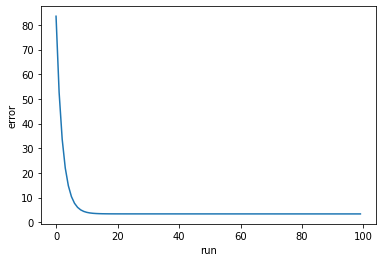

In [51]:
plt.plot(range(runs), losses)
plt.xlabel('run')
plt.ylabel('error')
#plt.title("Error")

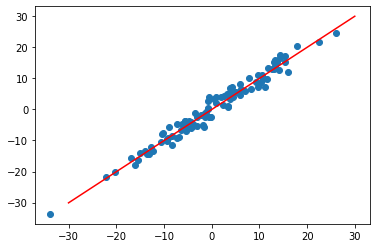

In [53]:
plot_fit("Trained model", model)
plt.scatter(x,y)
plt.show()